## Adapted from citibikes_gender.ipynb found at https://github.com/fedhere/PUI2016_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb

## Completed by Jonathan Toy @jontoy

# IDEA: 
    Younger citi bike users are more likely to take longer trips than older individuals

## NULL HYPOTHESIS:
    
    $H_0$ : The mean trip duration for individuals 40 years of age or under is the same or lower than the mean trip duration for individuals over 40.

## Alternative Hypothesis:

    $H_a$ : The mean trip duration for individuals 40 years of age or under is higher than the mean trip duration for individuals over 40.
    
    Testing will be down with an $\alpha = 0.05$ significance level.
     

In [ ]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

To test our hypothesis we will be looking at citi bike rider data from February 2015, imported locally as a .csv file

In [71]:
zip = ZipFile(os.getenv("PUIDATA") + '/HW3_jt2276/201502-citibike-tripdata.zip')
zip.extractall()

df = pd.read_csv("/201502-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


To test our hypothesis, we only need the trip duration and rider age, stored in the 'tripduration' and 'birth year' columns. The remaining columns will be dropped.

In [72]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [73]:
df.head()

,tripduration,birth year
0,801,1978.0
1,379,1993.0
2,2474,1969.0
3,818,1985.0
4,544,1957.0


We can create an 'age' column using the difference between the current year and the riders' birth years.

In [75]:
df['age'] = 2016 - df['birth year']

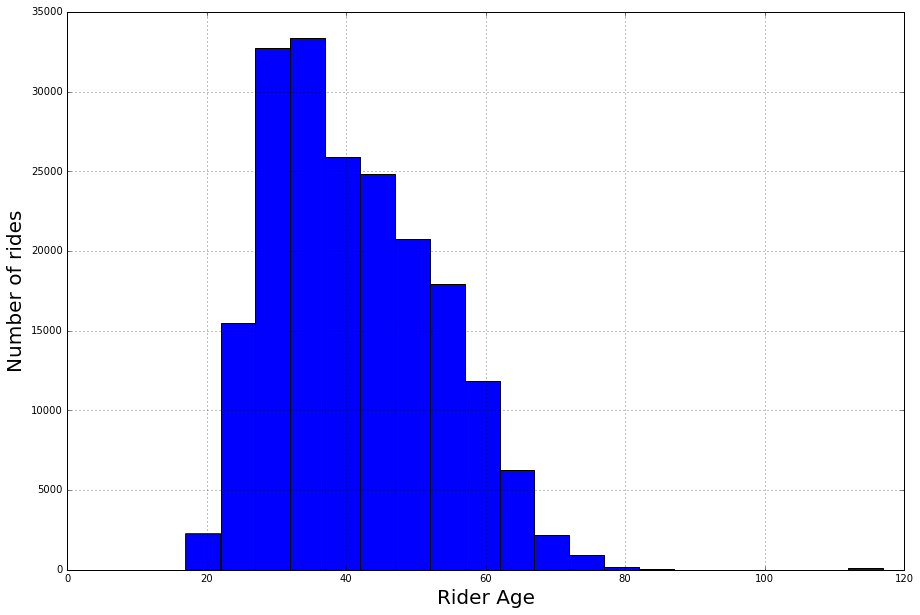

In [76]:
fig = pl.figure(figsize(15,10))
ax = df['age'].hist(bins=20)
ax.set_ylabel ("Number of rides", fontsize = 20)
ax.set_xlabel ("Rider Age", fontsize = 20)

# Figure 1: Distribution of Citi bike rider age in Febrary 2015. The mean age is approximately 40 years.

In [77]:
df['Over 40'] = (df['age'] > 40)
df['tripdurationmins'] = df['tripduration']/60

Now that we have the riders' ages, we can check whether they fall abover or below 40. We can also change the 'tripduration' column to display the duration in minutes, which is more easily comprehensible.

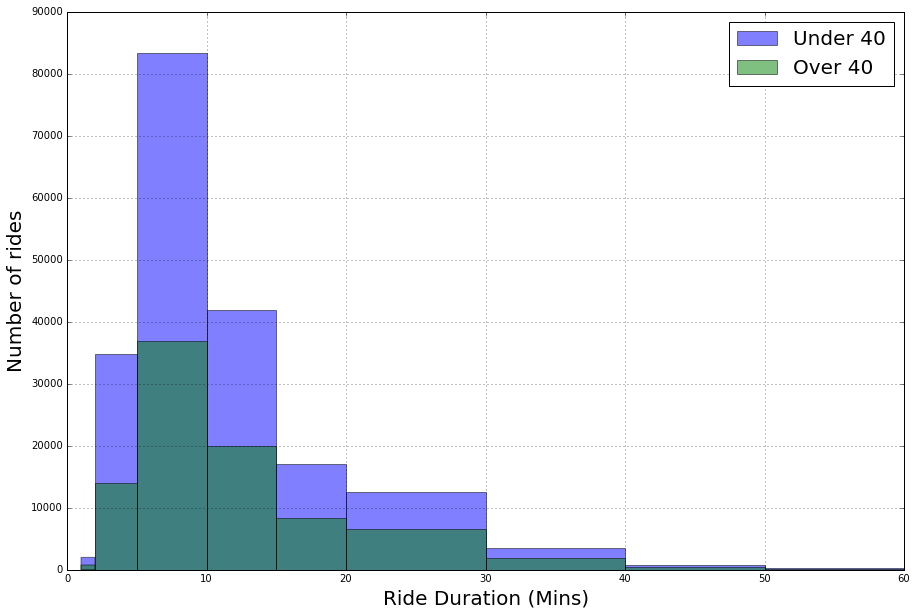

In [78]:
fig = pl.figure(figsize(15,10))
df['tripdurationmins'].hist(bins=[1,2,5,10,15,20,30,40,50,60], alpha=0.5, label = 'Under 40')
ax = (df['tripdurationmins'][df['Over 40'] == 1]).hist(bins=[1,2,5,10,15,20,30,40,50,60], alpha=0.5, label='Over 40')
ax.set_ylabel ("Number of rides", fontsize = 20)
ax.set_xlabel ("Ride Duration (Mins)", fontsize = 20)
pl.legend(['Under 40','Over 40'],fontsize=20)

# Figure 2: Distribution of Citibike bike trip duration by age in February 2015, absolute counts (stacked)

The distributions for ride duration between the two groups appear to be roughly comparable, to note any visible differences between the two, we will next normalize the counts and un-stack the two histograms.

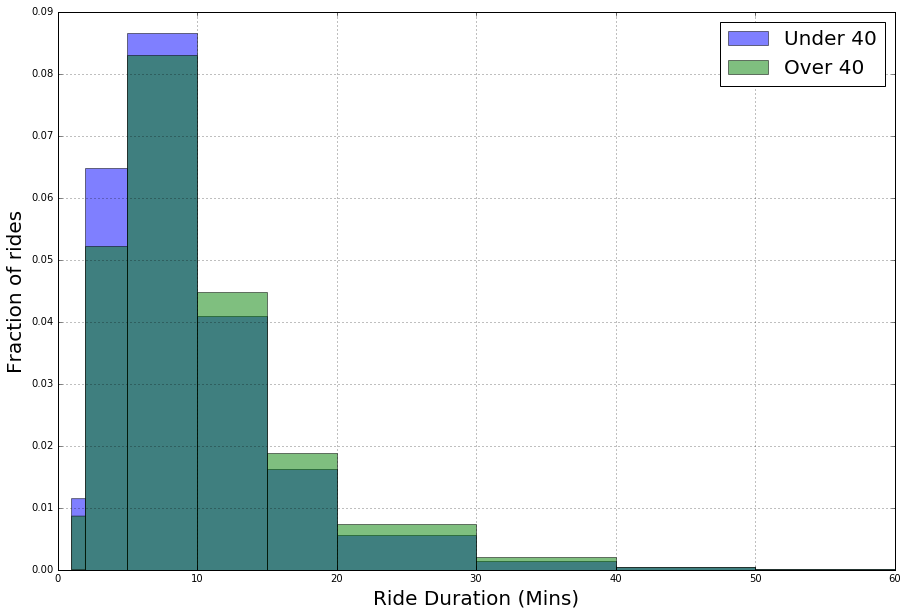

In [58]:
fig = pl.figure(figsize(15,10))
(df['tripdurationmins'][df['Over 40'] == 0]).hist(bins=[1,2,5,10,15,20,30,40,50,60], normed=True, alpha=0.5, label = 'Under 40')
ax = (df['tripdurationmins'][df['Over 40'] == 1]).hist(bins=[1,2,5,10,15,20,30,40,50,60], normed=True, alpha=0.5, label = 'Over 40')
ax.set_ylabel ("Fraction of rides", fontsize = 20)
ax.set_xlabel ("Ride Duration (Mins)", fontsize = 20)
pl.legend(['Under 40','Over 40'],fontsize=20)

# Figure 3: Comparison of distribution of Citibike bike trip duration by age in February 2015, normalized

While comparable, the distribution for the 'Over 40' group appears to be skewed slightly towards longer ride durations when compared with the 'Under 40' group, which is contrary to what one would expect under $H_a$.

In [80]:
(df['tripdurationmins'][df['Over 40'] == 1]).mean()

11.324975457535057

In [70]:
(df['tripdurationmins'][df['Over 40'] == 0]).mean()

10.406603084051085

The mean trip duration for the 'Over 40' group is almost 1 minute longer than the 'Under 40' group.

In [82]:
(df['tripdurationmins'][df['Over 40'] == 1]).std()

14.771378907315324

In [81]:
(df['tripdurationmins'][df['Over 40'] == 0]).std()

14.35764251559661

It is worth noting that the standard deviation (and thus the variance) of both groups are quite high, making it unlikely that the previously noted difference between the two means is statistically significant.